<a href="https://colab.research.google.com/github/Praneethcruzon/Stock-Market/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from keras.models import Sequential
import pandas as pd
from tqdm import tqdm_notebook as tqdm_notebook
import numpy as np
df_ge = pd.read_csv("BMW.DE.csv")
df_ge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5639,2019-08-14,61.099998,61.099998,59.299999,59.599998,59.599998,1972805.0
5640,2019-08-15,59.759998,59.799999,58.040001,58.820000,58.820000,1934815.0
5641,2019-08-16,59.020000,59.639999,58.860001,59.560001,59.560001,1625628.0
5642,2019-08-19,60.230000,60.779999,59.889999,60.360001,60.360001,1283004.0
5643,2019-08-20,60.349998,60.580002,59.560001,59.740002,59.740002,1009171.0


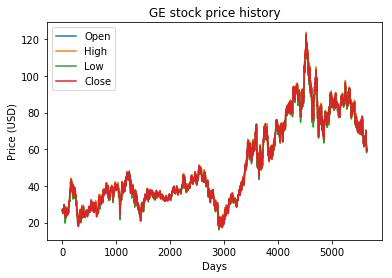

In [167]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

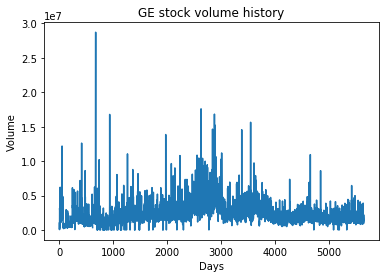

In [168]:
plt.figure()
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
df_ge = df_ge.dropna(how='any',axis=0) 
print("checking if any null values are present\n", df_ge.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


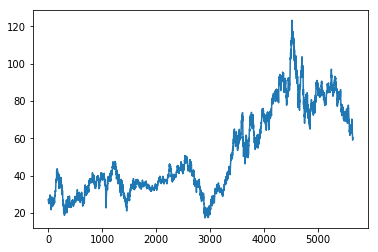

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_ge['Open'])
plt.show()

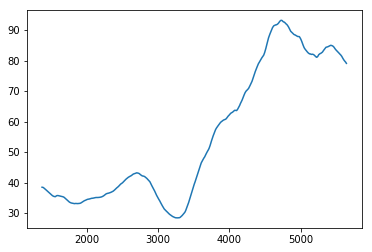

Train and Test size 4515 1129
[[       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 ...
 [0.99638599 0.99628587 0.99639479 0.99637381        nan]
 [0.998136   0.99813043 0.99819232 0.99820102        nan]
 [1.         1.         1.         1.                nan]]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-l

In [169]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
op = df_ge.rolling(window = 500)['Open','Close','Low','High'].mean()

op = pd.DataFrame(op)
plt.figure()
plt.plot(op['Open'])
plt.show()
df_train, df_test = train_test_split(op, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
print(x_train)
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

In [0]:

def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - 3
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, 3, dim_1))
    y = np.zeros((dim_0,))
    for i in range(dim_0):
        x[i] = mat[i:3+i]
        y[i] = mat[3+i, y_col_index]
    return x, y

In [0]:

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [0]:
print(x_train)
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, 2)
y_t = trim_dataset(y_t, 2)
x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, 2),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, 2),2)

[[       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 ...
 [0.99638599 0.99628587 0.99639479 0.99637381        nan]
 [0.998136   0.99813043 0.99819232 0.99820102        nan]
 [1.         1.         1.         1.                nan]]


In [0]:
from keras.optimizers import Adam
from keras.layers import Dense,Dropout
from keras.layers import LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(2, 3, x_t.shape[0]), stateful=True,kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5))

In [0]:
#x_t = x_t.dropna(how='any',axis=0)
#y_val
#df_ge = df_ge.dropna(how='any',axis=0) 

In [0]:
print("checking if any null values are present\n", df_ge.isna().sum())
from keras.callbacks import CSVLogger
import os
csv_logger = CSVLogger(os.path.join("User/Documents","/home", "abhi.log"), append=True)
history = lstm_model.fit(x_t, y_t, epochs=10, verbose=2, batch_size=2,
                    shuffle=False, validation_data=(trim_dataset(x_val, 2),
                    trim_dataset(y_val, 2)),callbacks=[csv_logger])

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


ValueError: ignored

In [0]:
print(history.history.keys())

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()